# 逻辑回归（Logistic Regression）
  
在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。  
设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。  
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。  

## 数据可视化

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# 读取文件
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [71]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [72]:
# 按类别分割数据集
positive = data.loc[data['admitted']==1]
negative = data.loc[data['admitted']==0]

negative.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


In [73]:
positive.head()

,exam1,exam2,admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


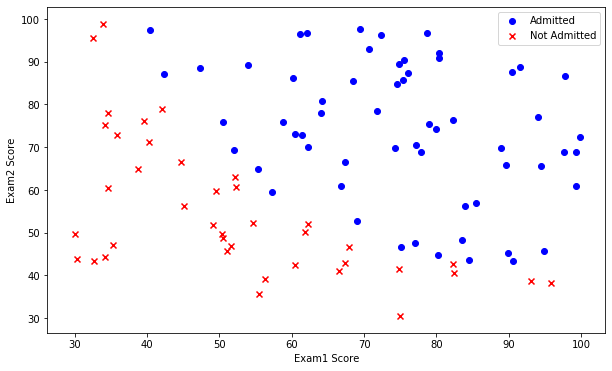

In [74]:
# 绘制图像
plt.figure(figsize=(10, 6))
plt.scatter(positive.exam1, positive.exam2, c='b', marker='o', label='Admitted')
plt.scatter(negative.exam1, negative.exam2, c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(loc=1)
plt.show()

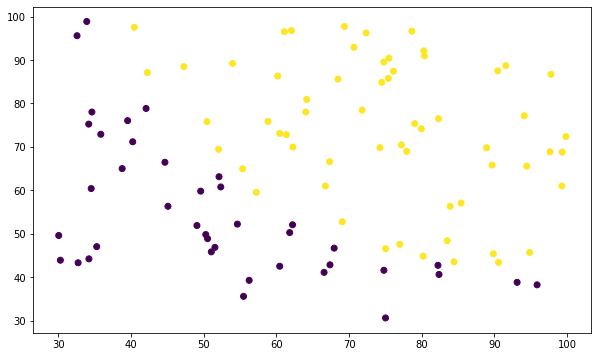

In [75]:
# 方式二：直接用data值进行绘制，不用将数据集分开，但是此时只能区分颜色，无法区分形状
plt.figure(figsize=(10, 6))
plt.scatter(data.exam1, data.exam2, c=data.admitted)
plt.show()

In [76]:
# 因为两个特征的量级一样且数值相差不大，故不用归一化

## Sigmoid函数
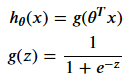

In [77]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

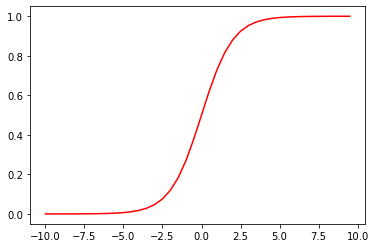

In [78]:
x = np.arange(-10, 10, 0.5)

plt.plot(x, sigmoid(x), 'r')
plt.show()

## 代价函数
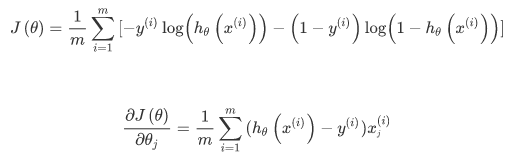

In [79]:
# 实现代价函数
def costFunction(X, y, theta):
    first = np.multiply(- y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / len(X) 

In [80]:
a = np.mat('1 2 3 4')
b = np.mat('2 2 2 2')

np.multiply(a, b)

matrix([[2, 4, 6, 8]])

In [81]:
# 加一列
data.insert(0, 'Ones', 1)

# 初始化变量
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.zeros(3))

In [82]:
t = np.log(sigmoid(X * theta.T))

In [83]:
# 检查矩阵维数
X.shape, y.shape, theta.shape, t.shape

((100, 3), (100, 1), (1, 3), (100, 1))

In [84]:
costFunction(X, y, theta)

0.6931471805599453

## 梯度函数
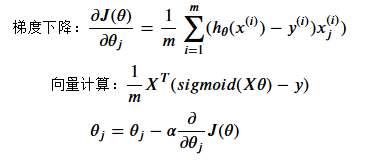

In [85]:
## 实现梯度函数(并没有更新θ)
def gradient(X, y, theta):
    m = len(X)
    dtheta = (sigmoid(X * theta.T) - y).T * X
    return dtheta / m

In [86]:
gradient(X, y, theta)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

## 用工具箱计算θ的值
  
在此前的线性回归中，我们自己写代码实现的梯度下降（ex1的2.2.4的部分）。当时我们写了一个代价函数、计算了他的梯度，然后对他执行了梯度下降的步骤。这次，我们不自己写代码实现梯度下降，我们会调用一个已有的库。这就是说，我们不用自己定义迭代次数和步长，功能会直接告诉我们最优解。  
andrew ng在课程中用的是Octave的“fminunc”函数，由于我们使用Python，我们可以用scipy.optimize.fmin_tnc做同样的事情。
（另外，如果对fminunc有疑问的，可以参考下面这篇百度文库的内容https://wenku.baidu.com/view/2f6ce65d0b1c59eef8c7b47a.html ）
如果一切顺利的话，最有θ对应的代价应该是0.203

In [87]:
# import scipy.optimize as opt
# result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X, y))
# result

In [88]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    m = len(X)  # 样本数量
    for i in range(iters):
        theta = theta - (alpha / m) * (X * theta.T - y).T * X  # 向量化，一步到位
        cost[i] = costFunction(X, y, theta) # 放在更新theta后面，为了cost走势图更好看
    return theta, cost

In [92]:
final_theta, cost = gradientDescent(X, y, theta, 0.00002, 10000)
final_theta

matrix([[-0.00990412,  0.00591625,  0.00409563]])

## 评价逻辑回归模型
写一个predict的函数，给出数据以及参数后，会返回“1”或者“0”。然后再把这个predict函数用于训练集上，看准确率怎样。  
  
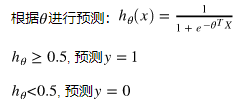


In [90]:
# 预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [91]:
# 模型正确率
# result[0] = [-25.16131862, 0.20623159, 0.20147149]
result = np.array([-25.16131862, 0.20623159, 0.20147149])
theta_min = np.matrix(result)
predictions = predict(theta_min, X)
correct = [1 if a^b == 0 else 0 for (a,b) in zip(predictions, y)]
accuracy = (sum(correct) / len(correct))
print('accuracy = {0:.0f}%'.format(accuracy*100))

accuracy = 89%


## 决策边界
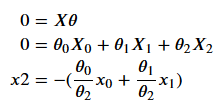